In [1]:
from Controller import *

import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
def preprocess_and_show(img, state):
    hsv_image = preprocess(img, state)
    img = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)
    plt.imshow(img)
    plt.title(title)
    plt.show()
    
def show(img):
    plt.imshow(img)
    plt.title(title)
    plt.show()
    
def show_lines_on_image(img, lines, state):
    hsv_image = preprocess(img, state)
    temp_img = cv2.cvtColor(hsv_image.copy(), cv2.COLOR_HSV2RGB)
    for line in lines:
        if line is not None:
            x1, y1, x2, y2 = line[0]
            cv2.line(temp_img, (x1, y1), (x2, y2), (255, 0, 0), 3)
    show(temp_img)

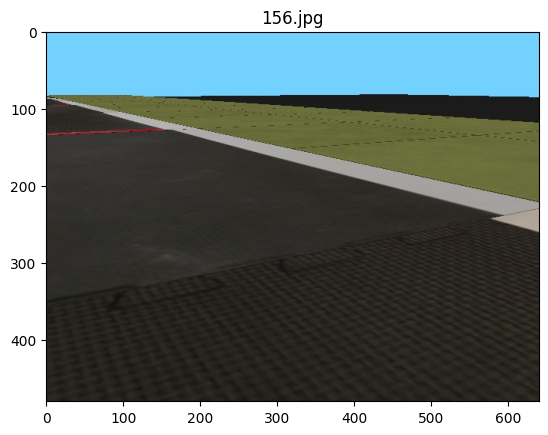

In [47]:
path = "observations_test"
title = "156.jpg"
state = State.TURNING_WITHIN_LANE
img = cv2.cvtColor(cv2.imread(os.path.join(path, title)), cv2.COLOR_BGR2RGB)
show(img)

Mode.LOOKDOWN
None [[416  44 590  88]] None


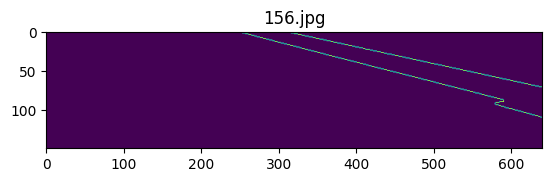

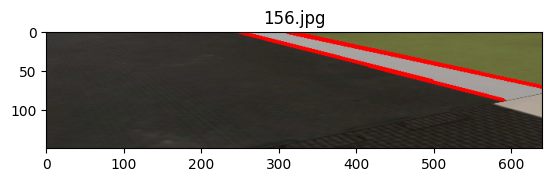

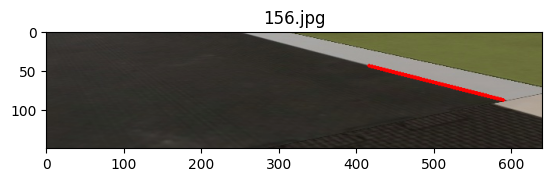

In [48]:
mode = get_mode_from_state(state)
print(mode)
yellow, white, red = get_lane_lines(img, state)
print(yellow, white, red)

edges = get_edges(preprocess(img, state), color="white", blur=True)
lines = get_lines_in_image(edges)

show(edges)
show_lines_on_image(img, lines, state) 

show_lines_on_image(img, [yellow, white, red], state)

In [18]:
d_est = get_d_est(yellow, white, mode)
heading = get_heading(yellow, white)

if (red is not None) and state in (State.IN_LANE_USING_RED, State.IN_LANE_AND_WAITING_TO_TURN, State.IN_LANE_AND_FORWARD):
    heading = get_heading_from_red_line(red) 
    
if state == State.TURNING_WITHIN_LANE:
    heading = np.radians(np.degrees(np.arctan(slope(white))) - 28)
    
if state == State.CROSSING_INTERSECTION:
    if (yellow is None) and (white is not None):  # left only intersection
        heading = np.radians(np.degrees(np.arctan(slope(white))) - 28)
    else:  # no lines visible, go straight
        heading = 0
        d_est = 0

k_p, k_d = get_pid_params_for(state)
steering = k_p * d_est + k_d * heading
speed = get_speed(steering, state)

print(k_p, k_d)
print("d_est = ", d_est)
print("heading = ", heading, ", and in degrees = ", np.degrees(heading))
print("steering = ", steering)
print("speed = ", speed)

0.15 12.5
d_est =  24.5
heading =  -0.05235987755982989 , and in degrees =  -3.0000000000000004
steering =  3.020501530502126
speed =  0.89


In [15]:
if yellow is not None: 
    print("yellow_slope:", angle_in_degrees(yellow) )
    print("yellow_distance:", get_distance_from_line(yellow, mode))
if white is not None: 
    print("white_slope:", angle_in_degrees(white))
    print("white_distance:", get_distance_from_line(white, mode))
if red is not None:
    print("red_slope:", angle_in_degrees(red))
    

# print(np.degrees(np.arctan(slope(red))))
# print(np.degrees(np.arctan((-1/slope(red)))))
#(get_distance_from_line(yellow, mode) - get_distance_from_line(white, mode))/2
#np.degrees(np.arctan(slope(yellow))) - 90 + DEGREES_OFFSET
#get_distance_from_line(yellow, mode) - one_side_distance_offset(mode)

yellow_slope: -35.28674897090327
yellow_distance: 231.0
white_slope: 21.982438201294066
white_distance: 209.0


[[475   0 638  40]] 14.0 183.0 167.83622970026465


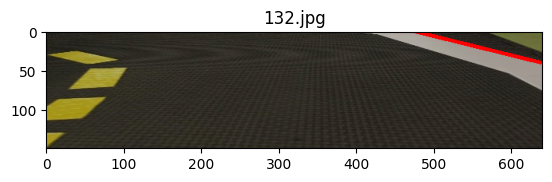

[[425   3 545  39]] 17.0 171.0 125.2836781069266


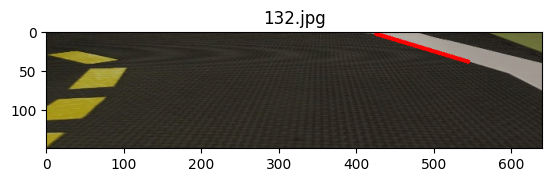

[[457  12 601  56]] 17.0 172.0 150.57224179774968


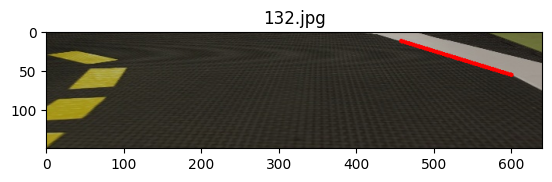

In [23]:
for line in lines:
#for line in filter_outlier_lines(lines):
    print(line, np.around(np.degrees(np.arctan(slope(line)))), get_distance_from_line(line, mode), get_length(line))
    show_lines_on_image(img, [line], state) 

In [24]:
slopes = [abs(np.around(np.degrees(np.arctan(slope(line))))) for line in lines]
mean = np.mean(slopes)
std = np.std(slopes)
print(mean, std)
print(min(2 * std, 15))

16.0 1.4142135623730951
2.8284271247461903


In [ ]:
filtered_lines = [line for line in lines if (abs(mean - abs(np.around(np.degrees(np.arctan(slope(line)))))) <= min(2 * std, 15))]

In [ ]:
filtered_lines

In [ ]:
(np.degrees(np.arctan(slope(yellow))) + np.degrees(np.arctan(slope(white)))) + 3

In [ ]:
longer_lines = [line for line in lines if get_length(line) > 99]
longer_lines

In [ ]:
is_yellow_to_left_of_white(yellow, white)

In [ ]:
[line for line in lines if np.degrees(np.arctan(slope(line))) > 15]

In [ ]:
get_length(white)